# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [ ]:
df.head()

,X1,X2,y
0,0.000000,A,10.820751
1,0.000628,A,9.401966
2,0.001257,B,1.862096
3,0.001885,B,7.646998
4,0.002514,A,5.977501


array([[<Axes: xlabel='X1', ylabel='X1'>,
        <Axes: xlabel='y', ylabel='X1'>],
       [<Axes: xlabel='X1', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>]],
      dtype=object)

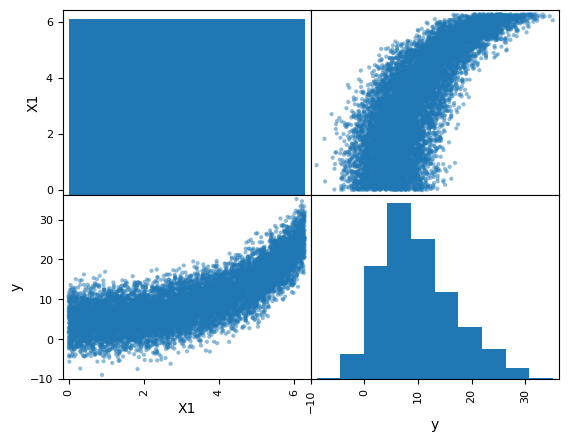

In [ ]:
pd.plotting.scatter_matrix(df)

In [ ]:
correlation = df[['X1','y']].corr()
print(correlation)

          X1         y
X1  1.000000  0.762651
y   0.762651  1.000000


<Axes: xlabel='X1', ylabel='y'>

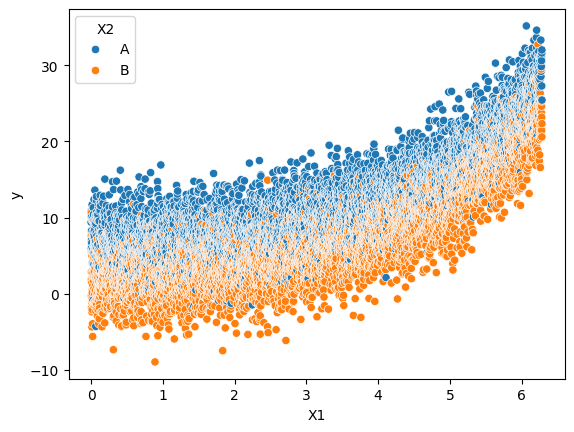

In [ ]:
#Visualizing X1 vs y with X2 Categories

sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: xlabel='X1', ylabel='y'>

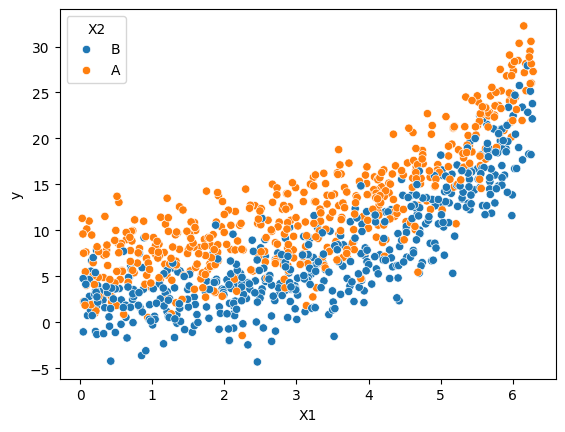

In [ ]:
# Scatter Plot of X1 vs y (Sample of 1000), Colored by X2

sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo:
explain findings in the graphs

The second graph, based on a sample of 1000 points, is clearer and less cluttered, making it easier to observe trends. The first graph, using the full dataset, shows a denser distribution with significant overplotting, though the overall pattern remains the same; y increases as X1 increases, with group A generally having higher y-values than group B.

In [ ]:
X = df[['X1', 'X2']]
y = df.y

In [ ]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,A
2,0.001257,B
3,0.001885,B
4,0.002514,A


In [ ]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y)

0.5816366418633327

In [ ]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5816366418633327

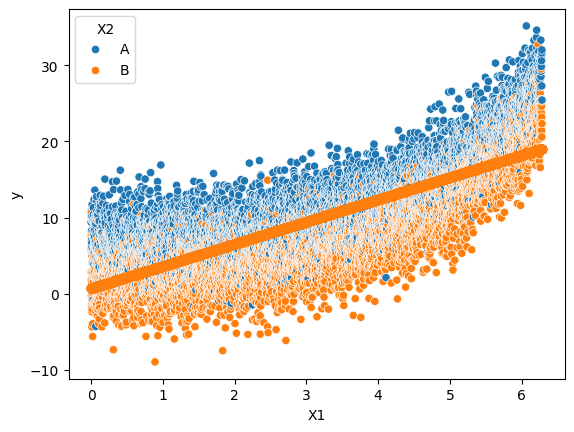

In [ ]:
#Actual vs Predicted Values: X1 vs y, Colored by X2
sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)

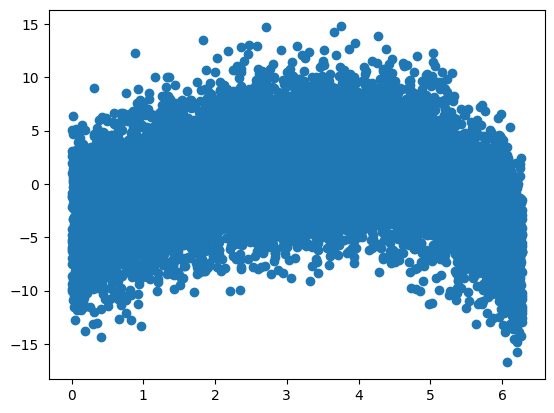

In [ ]:
#Residual Plot: Prediction Error (y_pred - y) vs X1

plt.scatter(X.X1, y_pred-y)

<Axes: >

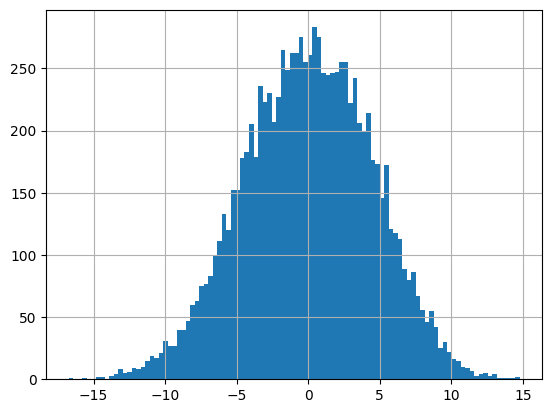

In [ ]:
# Residual Distribution: Histogram of Prediction Errors

(y_pred-y).hist(bins=100)

#### Todo:
Explain findings in the graphs above & what we can try next

The first graph shows that a linear model does not capture the curvature in the data, leading to systematic errors. The second graph's residual plot reveals a clear pattern, indicating model misfit, while the third graph’s histogram suggests residuals are roughly normal but spread out, reinforcing non-linearity. To improve, we can try polynomial regression, non-linear models (e.g., random forests), or feature transformations like X1^2 to better capture the trend and reduce residual patterns.

In [ ]:
# The code applies polynomial regression (degree 2) to model non-linearity in X1,
# fits a linear regression model, and evaluates it using the R² score to measure performance.

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

0.6783925899019746

In [ ]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6783925899019746

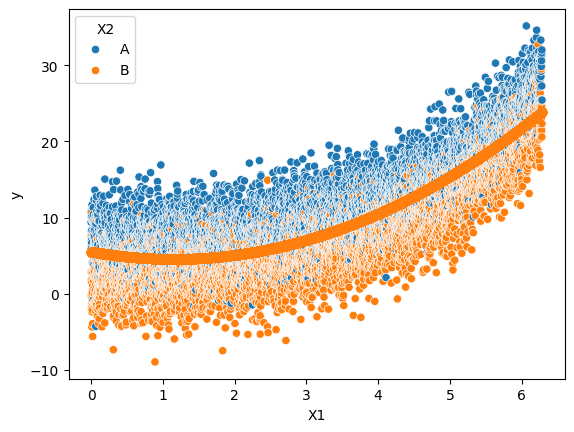

In [ ]:
# Actual vs Predicted Values: Scatter Plot Colored by X2

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)

<Axes: >

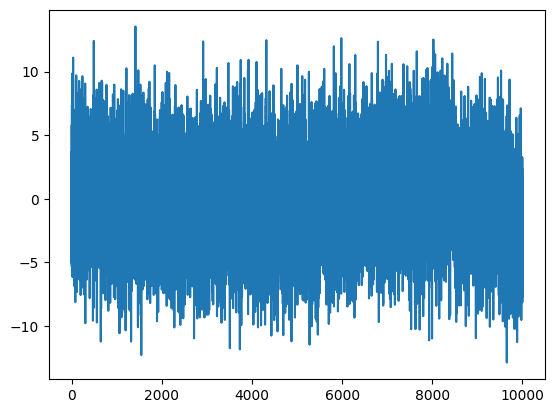

In [ ]:
# Residuals Plot: Prediction Errors Over Index

(y_pred-y).plot()

<Axes: >

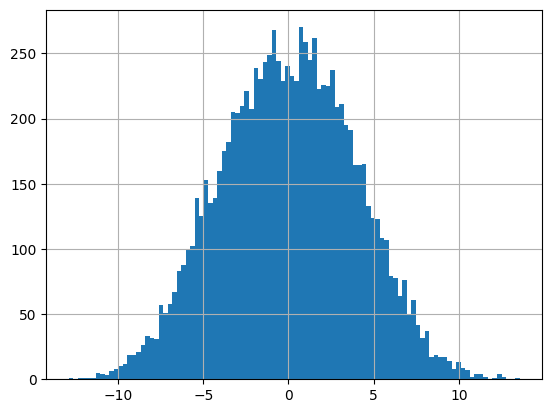

In [ ]:
# Residual Distribution: Histogram of Prediction Errors

(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next?

##  Finally:

In [ ]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(),
#     columns=encoder.get_feature_names_out()
# ).head()

In [ ]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [ ]:
encoded_df = pd.DataFrame(
    data=encoded.todense(),
    columns=encoder.get_feature_names_out()
)

In [ ]:
encoded_df.head()

,X2_B
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [ ]:
'''The code creates X_new by combining the numerical
feature X1 with encoded categorical features from encoded_df.
This ensures the dataset is ready for model training with both feature types.'''

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,0.0
2,0.001257,1.0
3,0.001885,1.0
4,0.002514,0.0


In [ ]:
'''The code applies polynomial feature transformation to X_new,
fits a linear regression model,
and evaluates its performance using the R² score
to capture non-linearity in the data.'''

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

0.8041045561923756

In [ ]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8041045561923756

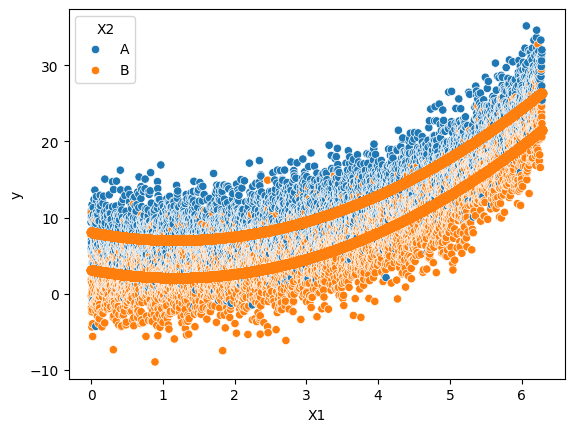

In [ ]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

#Actual vs Predicted Values: Scatter Plot Colored by X2

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X_new.X1, y_pred)

<Axes: >

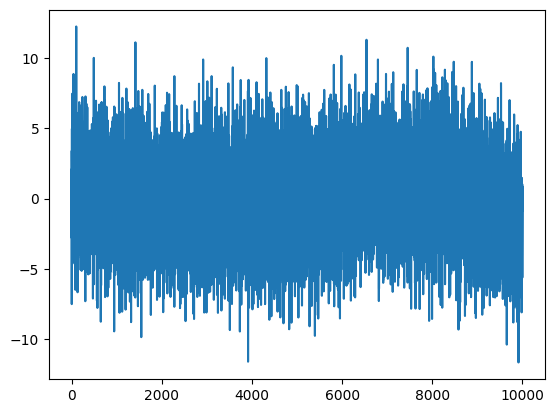

In [ ]:
# Residuals Plot: Prediction Errors Over Index

(y_pred-y).plot()

<Axes: >

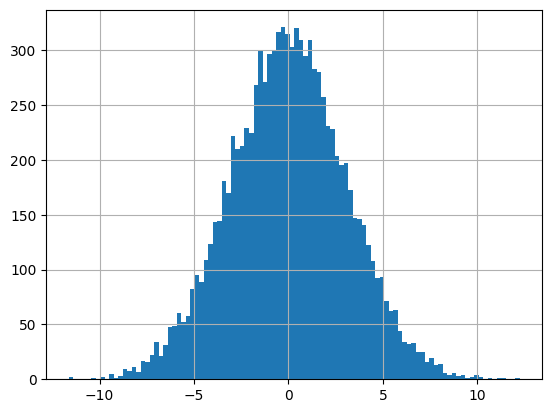

In [ ]:
#Residual Distribution: Histogram of Prediction Errors

(y_pred-y).hist(bins=100)

#### Todo:
explain results

## Create a train-test split

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set.
 * Get the r2_score on the test set.

 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.

 __eg:__

 `encoded_training = encoder.fit_transform(X_train[categorical_features])`

 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [ ]:
X_training.head()

,X1,X2
6466,4.063114,B
4164,2.616580,A
8308,5.220592,B
948,0.595706,B
6484,4.074425,A


In [ ]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
6466,4.063114,1.0
4164,2.616580,0.0
8308,5.220592,1.0
948,0.595706,1.0
6484,4.074425,0.0
4094,2.572593,1.0
7419,4.661961,1.0
4963,3.118657,1.0
4472,2.810121,1.0
3317,2.084341,1.0


In [ ]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})

m.score(X_test2, y_test)

0.6976785929693969

## Create a pipeline

Add comments to `todo` parts

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# Applies polynomial feature transformation to numerical variables to capture non-linear relationships.
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# Encodes categorical variables using one-hot encoding while ignoring unknown categories and dropping the first category to avoid multicollinearity.
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

#  Combines numerical and categorical transformations into a single preprocessing pipeline for efficient feature engineering.
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [ ]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [ ]:
modeling_pipeline.score(X_test, y_test)

0.8002267673562486

## Evaluate/create residual plots

In [ ]:
y_pred = modeling_pipeline.predict(X_test)

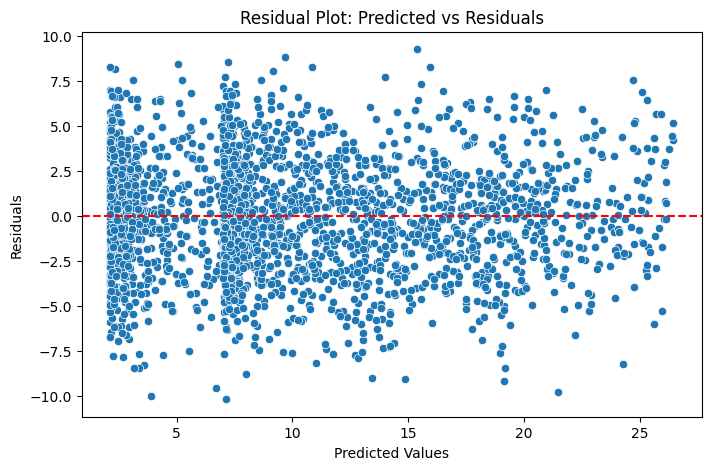

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Predicted vs Residuals")
plt.show()

## Explain findings

Explain findings

The residual plot shows clear patterns and heteroscedasticity, indicating that the model may not fully capture the relationship between features and the target variable. The presence of vertical bands suggests issues with categorical encoding, while increasing residual variance hints at a non-linear trend.